In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.patches as mpatches

import imageio
from PIL import Image
from pathlib import Path
from natsort import natsorted

In [2]:
official_data_path='./official_data/'
our_data_path='./val_test_data/'
image_path='./images/'

In [3]:
#airtemps = xr.tutorial.open_dataset("air_temperature")
iod_r=xr.open_dataset(official_data_path+'iod.nc')
vwind_r=xr.open_dataset(official_data_path+'vwnd.10m.anom.mon.mean.nc')
uwind_r=xr.open_dataset(official_data_path+'uwnd.10m.anom.mon.mean.nc')
precip_r=xr.open_dataset(official_data_path+'precip.anom.mon.mean.nc')
sst_r=xr.open_dataset(official_data_path+'sst.anom.mon.mean.nc')

d:\anaconda3\envs\final_sealab\lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [4]:
sst_cut = sst_r.sel(lat=slice(-20, 20), lon=slice(40, 120))
sst_cut.to_netcdf(our_data_path + 'sst_.nc')

> 격자 통합

In [5]:

merged_nc = xr.merge([uwind_r, vwind_r])
merged_nc.to_netcdf(our_data_path + 'wind.nc')
wind_r=xr.open_dataset(our_data_path+'wind.nc')


d:\anaconda3\envs\final_sealab\lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


> iod 시각화(event 포함)

In [6]:
# Create empty lists to store times for different conditions
iod_positive_times = []
iod_negative_times = []
other_times = []

# Iterate through the time dimension of iod_r
for i in range(len(iod_r['time'])):
    if iod_r['iod'][i] >= 0.4:
        iod_positive_times.append(iod_r['time'].values[i])
    elif iod_r['iod'][i] <= -0.4:
        iod_negative_times.append(iod_r['time'].values[i])
    else:
        other_times.append(iod_r['time'].values[i])

# Print or use the lists as needed
print("Times when iod >= 0.4:", iod_positive_times)
print("Times when iod <= -0.4:", iod_negative_times)
print("Other times:", other_times)


Times when iod >= 0.4: [numpy.datetime64('1982-02-01T00:00:00.000000000'), numpy.datetime64('1982-03-01T00:00:00.000000000'), numpy.datetime64('1982-04-01T00:00:00.000000000'), numpy.datetime64('1982-05-01T00:00:00.000000000'), numpy.datetime64('1982-06-01T00:00:00.000000000'), numpy.datetime64('1982-07-01T00:00:00.000000000'), numpy.datetime64('1982-08-01T00:00:00.000000000'), numpy.datetime64('1982-09-01T00:00:00.000000000'), numpy.datetime64('1982-10-01T00:00:00.000000000'), numpy.datetime64('1982-11-01T00:00:00.000000000'), numpy.datetime64('1983-06-01T00:00:00.000000000'), numpy.datetime64('1983-07-01T00:00:00.000000000'), numpy.datetime64('1983-08-01T00:00:00.000000000'), numpy.datetime64('1986-03-01T00:00:00.000000000'), numpy.datetime64('1987-09-01T00:00:00.000000000'), numpy.datetime64('1987-10-01T00:00:00.000000000'), numpy.datetime64('1991-04-01T00:00:00.000000000'), numpy.datetime64('1991-05-01T00:00:00.000000000'), numpy.datetime64('1994-04-01T00:00:00.000000000'), numpy.d

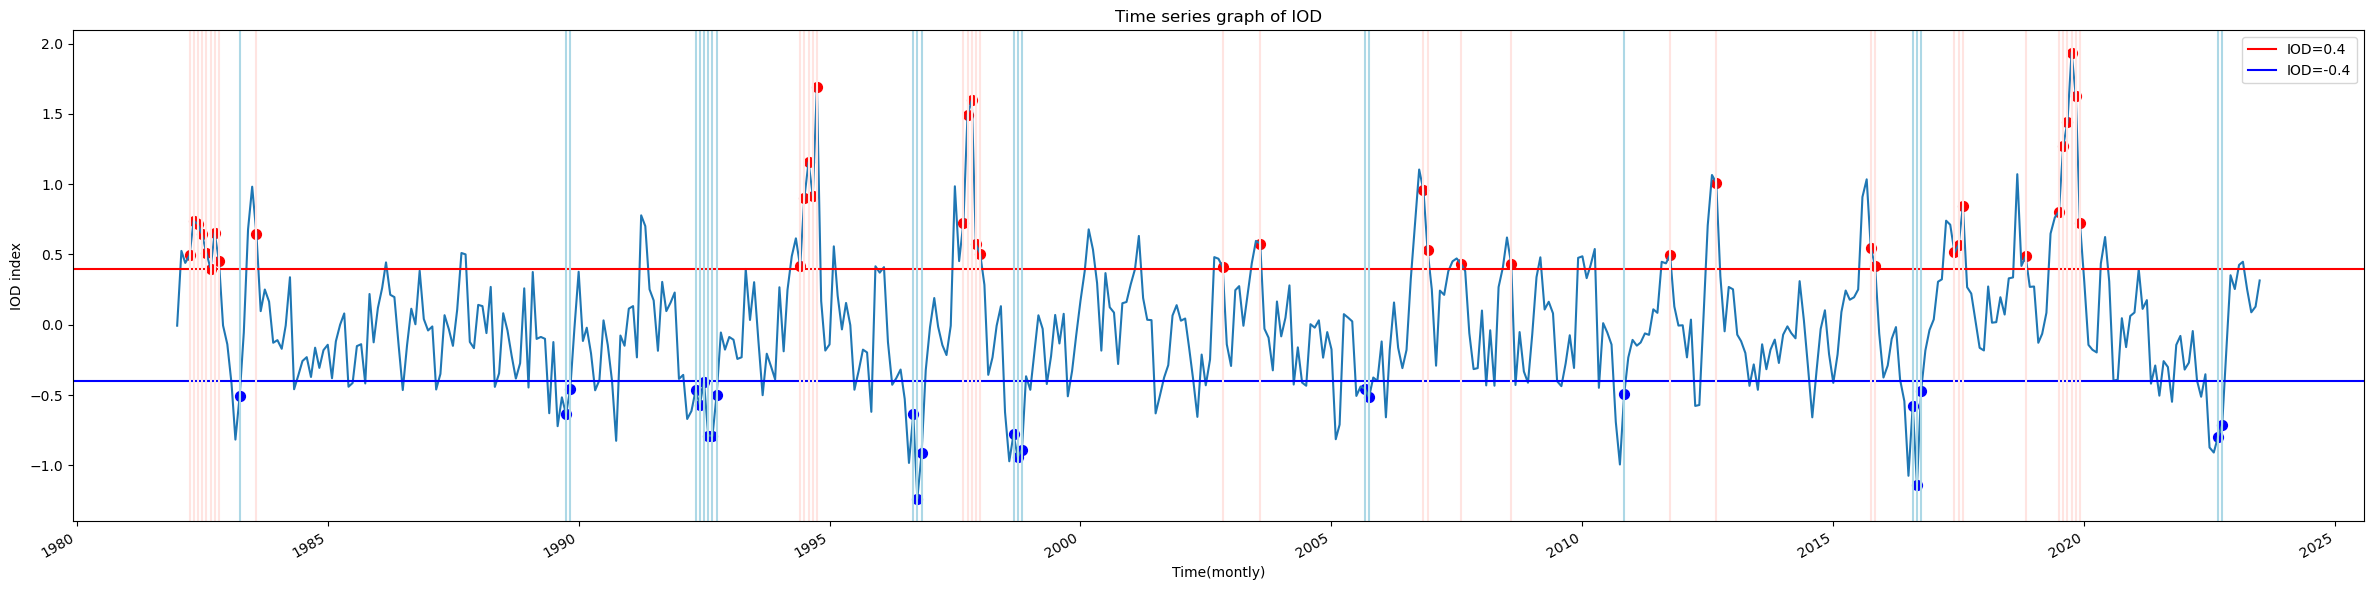

In [8]:
#event 시각화
iod=iod_r.iod
#iod_values = iod.values
iod_values = iod.values.flatten() 
iod.plot(aspect=4, size=6) #size 조절

#.figsize = (aspect * size, size)
plt.tight_layout()

plt.xlabel("Time(montly)")  # x축 이름 설정
plt.ylabel("IOD index")  # y축 이름 설정

plt.title("Time series graph of IOD")

# IOD 값이 0.4와 -0.4인 기준선 추가
plt.axhline(0.4, color='r', linestyle='-', label='IOD=0.4')
plt.axhline(-0.4, color='b', linestyle='-', label='IOD=-0.4')

plt.legend()  # 범례 추가

# IOD 값이 연속으로 3개월 이상 0.4 이상인 시간 식별
consecutive_months = 0
for i in range(len(iod)):
    if iod[i] >= 0.4:
        consecutive_months += 1
        if consecutive_months >= 3:
            # 연속 3개월 이상 0.4 이상인 시간에 세로선 추가
            plt.axvline(iod.time.values[i], color='mistyrose', linestyle='-', label='3+ consecutive months')
            #plt.fill_between(iod.time.values[i - 2:i + 1], iod[i - 2:i + 1], color='lightcolal')

            # IOD 값이 0.4 이상인 시간에 동그라미로 표시
            plt.scatter(iod.time.values[i], iod[i], color='r', marker='o', s=50, label='IOD>=0.4')
    else:
        consecutive_months = 0

consecutive_months = 0
for i in range(len(iod)):
    if iod[i] <= -0.4:
        consecutive_months += 1
        if consecutive_months >= 3:
            # 연속 3개월 이상 0.4 이하인 시간에 세로선 추가
            plt.axvline(iod.time.values[i], color='lightblue', linestyle='-', label='3+ consecutive months')
            # IOD 값이 0.4 이하인 시간에 동그라미로 표시
            plt.scatter(iod.time.values[i], iod[i], color='b', marker='o', s=50, label='IOD>=0.4')
    else:
        consecutive_months = 0

plt.savefig(image_path+'graph/iod_event.png', dpi=300, bbox_inches='tight')

plt.show()




> iod event에 따른 SST와 바람 시각화
> 이때, 데이터는 격자 통합 바람 데이터를 사용

In [9]:
#전체 데이터



# sst_cut = sst_r.sel(lat=slice(-20, 20), lon=slice(40, 120))

# Extract data for positive IOD times
iod_positive_pre = precip_r.sel(time=iod_positive_times).mean(dim='time')
# Extract data for negative IOD times
iod_negative_pre = precip_r.sel(time=iod_negative_times).mean(dim='time')
# Extract data for other times
other_pre = precip_r.sel(time=other_times).mean(dim='time')

# Extract data for positive IOD times
iod_positive_wind = wind_r.sel(time=iod_positive_times).mean(dim='time')
# Extract data for negative IOD times
iod_negative_wind = wind_r.sel(time=iod_negative_times).mean(dim='time')
# Extract data for other times
other_wind =wind_r.sel(time=other_times).mean(dim='time')



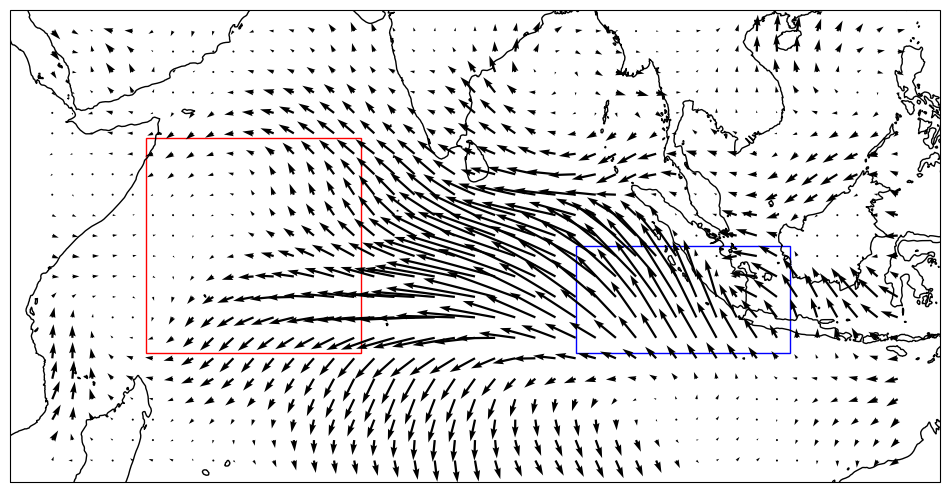

In [13]:
# if not os.path.exists('graph/wind'):
#     os.makedirs('graph/wind')


final_cut = iod_positive_wind .sel(lat=slice(-20, 20), lon=slice(40, 120))


u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))


ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)



# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/positive.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

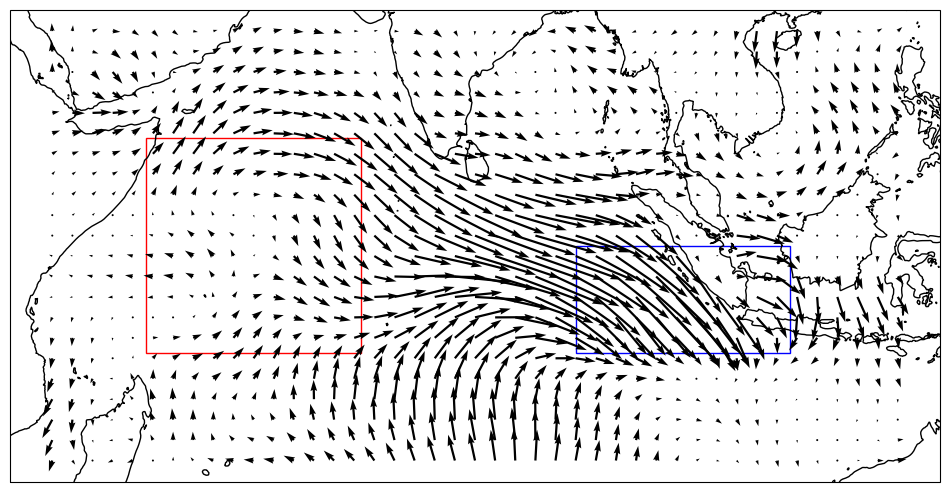

In [14]:
# if not os.path.exists('graph/wind'):
#     os.makedirs('graph/wind')


final_cut = iod_negative_wind.sel(lat=slice(-20, 20), lon=slice(40, 120))

u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)


# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/negative.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

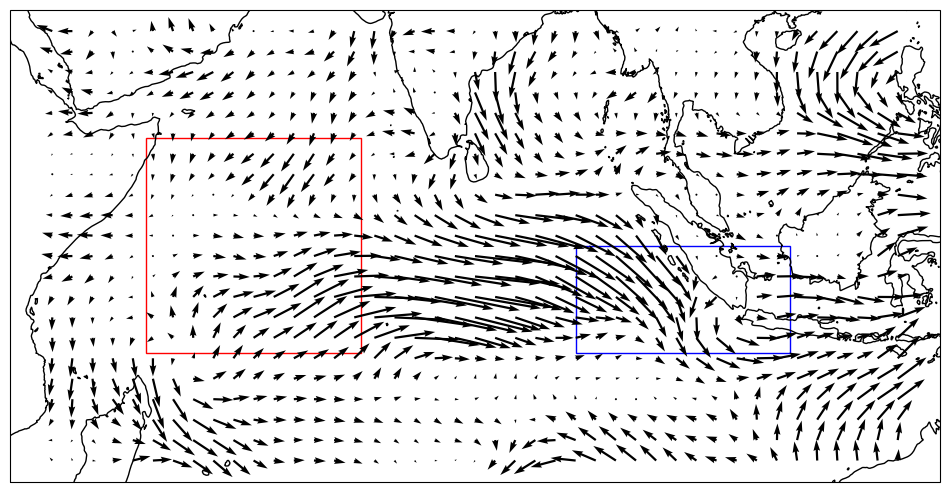

In [16]:
# if not os.path.exists('graph/wind'):
#     os.makedirs('graph/wind')


final_cut = other_wind.sel(lat=slice(-20, 20), lon=slice(40, 120))

u = final_cut.variables['uwnd'][:]
v = final_cut.variables['vwnd'][:]
lon = final_cut.variables['lon'][:]
lat = final_cut.variables['lat'][:]

lon2D, lat2D = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(12, 9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#범위지정
lon1, lon2, lat1, lat2 = 50, 70, 10, -10
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon2)

lon1, lon2, lat1, lat2 = 90, 110, -10, 0
vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(polygon)


# Plot wind vectors
ax.quiver(lon2D, lat2D, u[0, :, :], v[0, :, :], transform=ccrs.PlateCarree())
plt.savefig(image_path+'graph/neutral.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

> sst 시각화

In [ ]:
#sst_인도양 범위, 모든 기간
'''
* 서인도양 50-70˚E, 10˚S-10˚N
* 남동인도양 90-110˚E, 10˚S-적도
'''
if not os.path.exists(image_path+'graph/sst'):
    os.makedirs(image_path+'graph/sst')


time_list = pd.date_range(start='1982-01-01', end='2023-07-01', freq='MS')


for time_step in time_list:
    sst_cut = sst_r.sel(lat=slice(-20, 20), lon=slice(40, 120), time=time_step)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    sst_cut.sst.plot()
    ax.coastlines()

    plt.title(time_step.strftime('%Y-%m'), fontdict={'weight': 'bold', 'size': 14})

    #범위 표기
    lon1, lon2, lat1, lat2 = 50, 70, 10, -10
    vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

    polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(polygon2)

    lon1, lon2, lat1, lat2 = 90, 110, -10, 0
    vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

    polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(polygon)

    plt.savefig(f'{image_path}graph/sst/sst_{time_step.strftime("%Y%m")}.png', bbox_inches='tight', pad_inches=0.1)

    plt.close()

image_path_sst_ob = Path(image_path+'graph/sst') #특정 폴더/경로 지정

images = list(image_path_sst_ob.glob('*.png'))
images = natsorted(images)

image_list = []

# 모든 이미지를 동일한 크기로 조정하고 리스트에 추가
for file_name in images:
    img = Image.open(file_name)
    img = img.resize((920, 485))  # width와 height 수정
    image_list.append(np.array(img))

# Animated GIF 생성
imageio.mimwrite(image_path+'graph/sst_cut.gif', image_list, duration=500, loop=False)


> 강수량 시각화

In [21]:
#강수량_인도양 범위, 모든 기간
if not os.path.exists(image_path+'graph/precip'):
    os.makedirs(image_path+'graph/precip')


time_list = pd.date_range(start='1982-01-01', end='2023-07-01', freq='MS')


for time_step in time_list:
    precip_cut = precip_r.sel(lat=slice(-20, 20), lon=slice(40, 120), time=time_step)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    precip_cut.precip.plot()
    ax.coastlines()

    plt.title(time_step.strftime('%Y-%m'), fontdict={'weight': 'bold', 'size': 14})

    #범위 표기
    lon1, lon2, lat1, lat2 = 50, 70, 10, -10
    vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

    polygon2 = mpatches.Polygon(vertices, closed=True, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(polygon2)

    lon1, lon2, lat1, lat2 = 90, 110, -10, 0
    vertices = [(lon1, lat1), (lon2, lat1), (lon2, lat2), (lon1, lat2)]

    polygon = mpatches.Polygon(vertices, closed=True, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(polygon)

    plt.savefig(f'{image_path}graph/precip/precip_{time_step.strftime("%Y%m")}.png', bbox_inches='tight', pad_inches=0.1)

    plt.close()

image_path_precip_ob = Path(image_path+'graph/precip') #특정 폴더/경로 지정

images = list(image_path_precip_ob.glob('*.png'))
images = natsorted(images)

image_list = []

# 모든 이미지를 동일한 크기로 조정하고 리스트에 추가
for file_name in images:
    img = Image.open(file_name)
    img = img.resize((920, 485))  # width와 height 수정
    image_list.append(np.array(img))

# Animated GIF 생성
imageio.mimwrite(image_path+'graph/precip_cut.gif', image_list, duration=500, loop=False)
